<a href="https://colab.research.google.com/github/sohyunwriter/data-cookbook/blob/main/%EC%8B%A4%EC%8A%B5%EC%98%88%EC%A0%9C_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv, json
import re
import os
import pandas as pd
from typing import List, Dict

# 웹 크롤링 및 파싱
import requests
from bs4 import BeautifulSoup

# 시각화
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### 한글 깨짐 방지

In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126441 files and direc

In [25]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

## 1.네이버 뉴스 기사 크롤링

In [2]:
# backend url
# url = "https://s.search.naver.com/p/newssearch/3/api/tab/more?cluster_rank=36&de=&ds=&eid=&field=0&force_original=&is_dts=0&is_sug_officeid=0&mynews=0&news_office_checked=&nlu_query=&nqx_theme=%7B%22theme%22%3A%7B%22main%22%3A%7B%22name%22%3A%22corporation_hq%22%2C%22source%22%3A%22LLM%22%7D%2C%22sub%22%3A%5B%7B%22name%22%3A%22franchise_list%22%7D%2C%7B%22name%22%3A%22site%22%7D%5D%7D%7D&nso=so%3Ar%2Cp%3Aall%2Ca%3Aall&nx_and_query=&nx_search_hlquery=&nx_search_query=&nx_sub_query=&office_category=&office_section_code=0&office_type=0&pd=-1&photo=0&query=nh+%EB%86%8D%ED%98%91%EC%9D%80%ED%96%89&query_original=&rev=0&service_area=&sm=tab_smr&sort=0&spq=0&ssc=tab.news.all&start="

# web url
url = "https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&start="

In [4]:
# 웹 페이지를 요청해 HTML 가져오기
# User-Agent 지정해 일반 브라우저처럼 요청하도록 설정
raw = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})

# 가져온 HTML 문서를 BeautifulShoup 이용해 파싱
# "html.parser"를 사용해 HTML 구조를 이해할 수 있게 변환
soup = BeautifulSoup(raw.text, "html.parser")

# CSS 선택자를 이용해 특정 요소 찾기
# (예) <a> 태그 중 data-heatmap-target 속성이 ".tit"인 요소를 모두 선택
titles = soup.select('a[data-heatmap-target=".tit"]')

In [6]:
titles[0]

<a class="Vyg_WCkzlKBSk8usfmMA Kv_vr2pgKJ1YQu5GxPEk" data-heatmap-target=".tit" href="https://www.newsis.com/view/NISX20250924_0003342804" nocr="1" target="_blank"><span class="sds-comps-text sds-comps-text-ellipsis sds-comps-text-ellipsis-1 sds-comps-text-type-headline1">"<mark>비트코인</mark>보다 코스피"…국내 가상자산 보유액 89조로 급감</span></a>

In [7]:
titles[0].get_text(" ", strip=True)

'" 비트코인 보다 코스피"…국내 가상자산 보유액 89조로 급감'

In [15]:
cleaned_titles = []

for title in titles:
  # print(title)
  print(title.get_text(" ", strip=True))
  cleaned_titles.append(title.get_text(" ", strip=True))

" 비트코인 보다 코스피"…국내 가상자산 보유액 89조로 급감
" 비트코인 올랐는데, 왜"…국내 가상자산 시총 30% '뚝'
100배 대박 아니면 쪽박…"돈 빨리 벌래" 비트코인 퍼프스 투자 열풍
[코인 마켓워치] 비트코인 , 11만달러선 지킬까?
美금리인하에도 힘 못 받는 비트코인 …결국 오른다? [투자360]
비트코인 소폭 반등, 11만 3000달러대 거래
가상화폐 시장 혼조… 비트코인 , 11만3000달러대 횡보
美금리 인하후… 비트코인 꺾이고 금값은 신고가
비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리...
거래액 39%↑… 비트코인 ·이더리움·리플 XRP·도지코인·파이코인 하락
비트코인 ·이더리움·리플 등 동반 급락


In [16]:
cleaned_titles

['" 비트코인 보다 코스피"…국내 가상자산 보유액 89조로 급감',
 '" 비트코인 올랐는데, 왜"…국내 가상자산 시총 30% \'뚝\'',
 '100배 대박 아니면 쪽박…"돈 빨리 벌래" 비트코인 퍼프스 투자 열풍',
 '[코인 마켓워치] 비트코인 , 11만달러선 지킬까?',
 '美금리인하에도 힘 못 받는 비트코인 …결국 오른다? [투자360]',
 '비트코인 소폭 반등, 11만 3000달러대 거래',
 '가상화폐 시장 혼조… 비트코인 , 11만3000달러대 횡보',
 '美금리 인하후… 비트코인 꺾이고 금값은 신고가',
 '비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리...',
 '거래액 39%↑… 비트코인 ·이더리움·리플 XRP·도지코인·파이코인 하락',
 '비트코인 ·이더리움·리플 등 동반 급락']

In [20]:
df = pd.DataFrame(cleaned_titles, columns=['title'])
df.head()

,title
0,""" 비트코인 보다 코스피""…국내 가상자산 보유액 89조로 급감"
1,""" 비트코인 올랐는데, 왜""…국내 가상자산 시총 30% '뚝'"
2,"100배 대박 아니면 쪽박…""돈 빨리 벌래"" 비트코인 퍼프스 투자 열풍"
3,"[코인 마켓워치] 비트코인 , 11만달러선 지킬까?"
4,美금리인하에도 힘 못 받는 비트코인 …결국 오른다? [투자360]


### 네이버 뉴스 한 페이지 말고 여러 페이지 가져오기

In [ ]:
url = "https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8&start="

In [38]:
cleaned_titles_all = []

for i in range(1, 100, 10):
  # 웹 페이지를 요청해 HTML 가져오기
  # User-Agent 지정해 일반 브라우저처럼 요청하도록 설정
  raw = requests.get(url+str(i), headers={'User-Agent':'Mozilla/5.0'})

  # 가져온 HTML 문서를 BeautifulShoup 이용해 파싱
  # "html.parser"를 사용해 HTML 구조를 이해할 수 있게 변환
  soup = BeautifulSoup(raw.text, "html.parser")

  # CSS 선택자를 이용해 특정 요소 찾기
  # (예) <a> 태그 중 data-heatmap-target 속성이 ".tit"인 요소를 모두 선택
  titles = soup.select('a[data-heatmap-target=".tit"]')

  for title in titles:
    # print(title)
    print(title.get_text(" ", strip=True))
    cleaned_titles_all.append(title.get_text(" ", strip=True))



" 비트코인 보다 코스피"…국내 가상자산 보유액 89조로 급감
" 비트코인 올랐는데, 왜"…국내 가상자산 시총 30% '뚝'
비트코인 하락세 지속···11만 달러 붕괴
100배 대박 아니면 쪽박…"돈 빨리 벌래" 비트코인 퍼프스 투자 열풍
11만달러 무너진 비트코인 … 주요 가상자산 6% 급락
[코인 마켓워치] 비트코인 , 11만달러선 지킬까?
美금리인하에도 힘 못 받는 비트코인 …결국 오른다? [투자360]
[08:12 가상자산] 비트코인 1억6000만원 선 붕괴
美금리 인하후… 비트코인 꺾이고 금값은 신고가
비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리...
1억6000만원대 갇힌 비트코인 …알트코인 중 리플만 반등
11만달러 반납한 비트코인 …이더·리플 6%대 급락 [투자360]
비트코인 소폭 반등, 11만 3000달러대 거래
가상화폐 시장 혼조… 비트코인 , 11만3000달러대 횡보
오태민 " 비트코인 , 올해 말 폭락 예정돼있다! 단, 주목할 것은..."
강승구 "트레저리 기업·ETF보다 비트코인 보유가 답" [와우아카데미]
오태민 " 비트코인 , 올해 말 폭락 예정돼있다! 단, 주목할 것은..."
[08:12 가상자산] 비트코인 1억6000만원 선 붕괴
美금리 인하후… 비트코인 꺾이고 금값은 신고가
‘ 비트코인 맥시멀리스트’ 천명한 트럼프 형제들 [KBW2025]
트럼프 형제 " 비트코인 , 금융 민주화 실현할 혁신기술" [코리아 블록체...
비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리...
글로벌 규모 핀테크 '네+ 비트 ' 탄생…'비자·마스터' 게 섰거라
"금은 또 최고가인데"… 비트코인 , 한때 1억5900만원까지 밀려
거래액 39%↑… 비트코인 ·이더리움·리플 XRP·도지코인·파이코인 하락
비트코인 등 주요 코인, 230억달러 옵션 만기 앞두고 급락 압력
비트코인 ·이더리움 등, 230억 달러 옵션 만기 코앞...어디까지 밀릴까
비트코인 ·이더리움·리플 등 동반 급락
비트코인 10배 

In [39]:
df = pd.DataFrame(cleaned_titles_all, columns=['title'])
df.head()

,title
0,""" 비트코인 보다 코스피""…국내 가상자산 보유액 89조로 급감"
1,""" 비트코인 올랐는데, 왜""…국내 가상자산 시총 30% '뚝'"
2,비트코인 하락세 지속···11만 달러 붕괴
3,"100배 대박 아니면 쪽박…""돈 빨리 벌래"" 비트코인 퍼프스 투자 열풍"
4,11만달러 무너진 비트코인 … 주요 가상자산 6% 급락


## 2.EDA

### 2.1. 불용어 설정

In [45]:
my_stopwords = ["보다", "뉴스", "비트코인", "가상자산"] # 워드클라우드에 등장하면 안 되는 불용어 설정

In [46]:
text = ' '.join(list(df["title"]))

In [47]:
print(text)

" 비트코인 보다 코스피"…국내 가상자산 보유액 89조로 급감 " 비트코인 올랐는데, 왜"…국내 가상자산 시총 30% '뚝' 비트코인 하락세 지속···11만 달러 붕괴 100배 대박 아니면 쪽박…"돈 빨리 벌래" 비트코인 퍼프스 투자 열풍 11만달러 무너진 비트코인 … 주요 가상자산 6% 급락 [코인 마켓워치] 비트코인 , 11만달러선 지킬까? 美금리인하에도 힘 못 받는 비트코인 …결국 오른다? [투자360] [08:12 가상자산] 비트코인 1억6000만원 선 붕괴 美금리 인하후… 비트코인 꺾이고 금값은 신고가 비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리... 1억6000만원대 갇힌 비트코인 …알트코인 중 리플만 반등 11만달러 반납한 비트코인 …이더·리플 6%대 급락 [투자360] 비트코인 소폭 반등, 11만 3000달러대 거래 가상화폐 시장 혼조… 비트코인 , 11만3000달러대 횡보 오태민 " 비트코인 , 올해 말 폭락 예정돼있다! 단, 주목할 것은..." 강승구 "트레저리 기업·ETF보다 비트코인 보유가 답" [와우아카데미] 오태민 " 비트코인 , 올해 말 폭락 예정돼있다! 단, 주목할 것은..." [08:12 가상자산] 비트코인 1억6000만원 선 붕괴 美금리 인하후… 비트코인 꺾이고 금값은 신고가 ‘ 비트코인 맥시멀리스트’ 천명한 트럼프 형제들 [KBW2025] 트럼프 형제 " 비트코인 , 금융 민주화 실현할 혁신기술" [코리아 블록체... 비트코인 , 11.3만 달러 회복…마이클 세일러 "연말까지 상승"[코인브리... 글로벌 규모 핀테크 '네+ 비트 ' 탄생…'비자·마스터' 게 섰거라 "금은 또 최고가인데"… 비트코인 , 한때 1억5900만원까지 밀려 거래액 39%↑… 비트코인 ·이더리움·리플 XRP·도지코인·파이코인 하락 비트코인 등 주요 코인, 230억달러 옵션 만기 앞두고 급락 압력 비트코인 ·이더리움 등, 230억 달러 옵션 만기 코앞...어디까지 밀릴까 비트코인 ·이더리움·리플 등 동반 급락 비트코인 10배 

### 2.2. 워드클라우드 생성

In [48]:
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
                    stopwords=my_stopwords).generate(text)

### 2.3. 워드클라우드 시각화

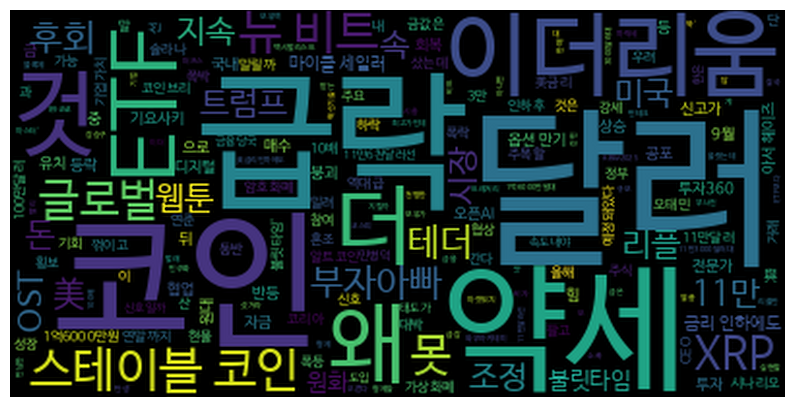

In [49]:
plt.figure(figsize=(10,10)) #이미지 사이즈 지정
plt.imshow(wordcloud, interpolation='lanczos') #이미지의 부드럽기 정도
plt.axis('off') #x y 축 숫자 제거
plt.show()
#plt.savefig()